In [2]:
import math
from scipy.stats import binom, geom, poisson, hypergeom
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Exercício 17

In [18]:
# a) probabilidade de no minimo 2 ocorrerem
f = lambda k: binom.pmf(k, 15, .25)
sum(f(k) for k in range(2, 16))

np.float64(0.9198192339390516)

In [25]:
# b) probabilidade de acontecer no minimo 12 vezes a possibilidade contra (no máximo 3 vezes de ocorrer a probabilidade principal)
f = lambda k: binom.pmf(k, 15, .25)
sum(f(k) for k in range(0,4))

np.float64(0.46128687635064136)

In [41]:
# c) havendo mais de 5 esportistas, obtermos menos de 7
# P(X<7 | X>5) = P(X>5 | X<7) / p(x<7)

binom.pmf(6,15,.25) / (1 - binom.cdf(5, 15, .25))

np.float64(0.6183794312700834)

# Exercício 19

In [53]:
# a) todas as 15 vigas serem boas para uso
binom.pmf(15, 15, 0.9)

np.float64(0.20589113209464913)

In [73]:
# b) no mínimo 13 serem boas
binom.pmf(15, 15, .9) + binom.pmf(14, 15, .9) + binom.pmf(13, 15, .9)

# ou

1 - binom.cdf(12, 15, .9)

np.float64(0.8159389308936091)

# Exercício 21

In [78]:
# a) com poisson de 5, probabilidade de ocorrer mais de 2
1 - poisson.cdf(2, 5)

np.float64(0.8753479805169189)

In [101]:
# b) se em 1 hora se espera 5 chamadas, qual prob de ter 50 chamadas em 8 horas (esperando 40 pq 5 * 8 é 40)
poisson.pmf(50, 5 * 8)

np.float64(0.01770701755263633)

In [122]:
# c) é raro receber em 1 dia de trabalho (8 horas) nenhuma ligação?
poisson.pmf(0, 40) # é muito raro

# ou simplesmente ( e ^-40 ) como um numero muito baixo

np.float64(4.248354255291589e-18)

# Exercício 23

In [134]:
# a) probabilidade de sucesso na 11 tentativa
geom.pmf(11,.05)

np.float64(0.029936846961918936)

In [138]:
# b) probabilidade de sucesso depois de pelo menos 16 tentativas
1 - geom.cdf(15, .05)

np.float64(0.4632912301597534)

In [193]:
# c) 
1 - geom.cdf(9,.05)

np.float64(0.6302494097246093)

# Exercício 25

In [230]:
# a) probabilidade de durar menos de 500 (sabendo que a prob de durar 100 é 0.7)
geom.cdf(5, .7) # x < 5

np.float64(0.99757)

In [270]:
# b)
geom.pmf(4, .7)

np.float64(0.018900000000000007)

In [274]:
# c)sabendo que dura mais de 300, durar mais que 800
a = 1 - geom.cdf(4, .7) # x > 300
b = 1 - geom.cdf(9, .7) # x > 800
b / a # P(X > 800 | X > 300) = P(X > 800) / P(X > 300)

np.float64(0.0024299999999990835)

# Exercício 27

In [21]:
# a) em 20 livros há 4 defeituosos, qual a chance de 4 meninas pegarem 3 livros defeituosos? (sem reposição)
hypergeom.pmf(3, 20, 4, 4)

np.float64(0.013209494324045407)

In [26]:
## b) qual a probabilidade de, após a visita das garotas, conter a mesma quantidade de livros defeituosos? E a probabilidade de conter nenhum livro defeituoso?

# k = ? # Número de livros defeituosos pegos
M = 20   # total de livros
n = 4    # livros defeituosos
N = 4    # livros escolhidos

hypergeom.pmf(0, M, n, N), hypergeom.pmf(4, M, n, N)

(np.float64(0.37564499484004127), np.float64(0.0002063983488132095))

# Exercício 28 (no computador)

In [77]:
# a) Para a tabela 1.1 no cap 1, construa uma tabela de frequencia para a variável Exerc, horas de atividade física por semana.
df_e28 = pd.read_csv('https://www.ime.usp.br/~noproest/dados/questionario.txt', sep=r"\s+", usecols=["Exerc"]).value_counts().reset_index()
df_e28['freq'] = round(df_e28['count']/df_e28['count'].sum(), 2)
df_e28 = df_e28.sort_values("Exerc")
df_e28

,Exerc,count,freq
0,0,8,0.16
6,1,3,0.06
1,2,8,0.16
3,3,6,0.12
5,4,4,0.08
2,5,8,0.16
7,6,3,0.06
4,7,5,0.10
8,8,3,0.06
9,10,2,0.04


In [78]:
# b) 5 pessoas selecionadas ao acaso, qual a probabilidade de que 3 delas pratiquem, pelo menos, 6 horas de atividades semanais

m = df_e28['count'].sum() # total de pessoas
n = df_e28[df_e28['Exerc']>= 6]['count'].sum()# Pessoas que praticam mais de 6 horas de exerc
N = 5 # pessoas sorteadas
k = 3 # certo numero de pessoas dentre as pessoas sorteadas que satisfazem uma condição

hypergeom.pmf(k,m,n,N)

np.float64(0.08989975268553303)

In [79]:
# c) repita o item b para calcular o número de pessoas que praticam pelo menos 6 horas para as 5 selecionadas

hypergeom.pmf(N,m,n,N)

np.float64(0.0006074307613887368)

# Exercício 29 (no computador)

In [118]:
# a 1)
# Criando lista com valores de alturas acima e igual/abaixo da mediana
df_e29 = pd.read_csv('https://www.ime.usp.br/~noproest/dados/questionario.txt', sep=r"\s+", usecols=["Alt"])
df_e29['Acima_Mediana'] = (df_e29['Alt'] > df_e29['Alt'].quantile(.5)).astype(int)
df_e29.head()

,Alt,Acima_Mediana
0,1.60,0
1,1.69,1
2,1.85,1
3,1.85,1
4,1.58,0


Text(0.5, -0.01, 'Legenda: 0 = abaixo da mediana, 1 = acima da mediana')

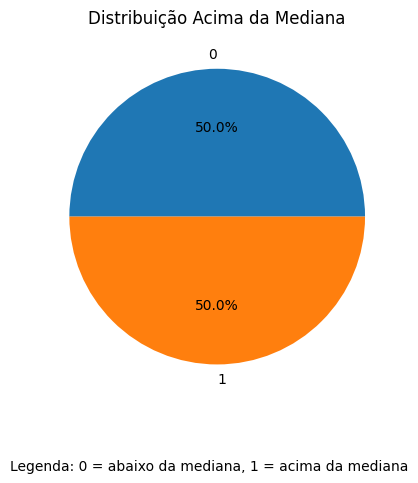

In [117]:
# a 2)
# Criando tabela de frequencia para esses valores 0 e 1.
df_med_freq = df_e29['Acima_Mediana'].value_counts().reset_index()
df_med_freq['freq'] = df_med_freq['count'] / df_med_freq['count'].sum()
df_med_freq.sort_values("Acima_Mediana")

# Plotando a tabela de frequencia criada
plt.pie(df_med_freq['freq'], labels=df_med_freq['Acima_Mediana'], autopct='%1.1f%%')

plt.title('Distribuição Acima da Mediana')
plt.suptitle('Legenda: 0 = abaixo da mediana, 1 = acima da mediana', fontsize=10, y=-0.01)

In [136]:
# b)
# X = somatória de yi onde yi é o número de alunos altos

binom.pmf(6, 13, .5)

np.float64(0.20947265625000022)

,Alunos Altos,count,freq
8,2,3,0.03
7,3,4,0.04
5,4,8,0.08
3,5,11,0.11
0,6,29,0.29
2,7,15,0.15
1,8,15,0.15
4,9,9,0.09
6,10,4,0.04
9,11,2,0.02


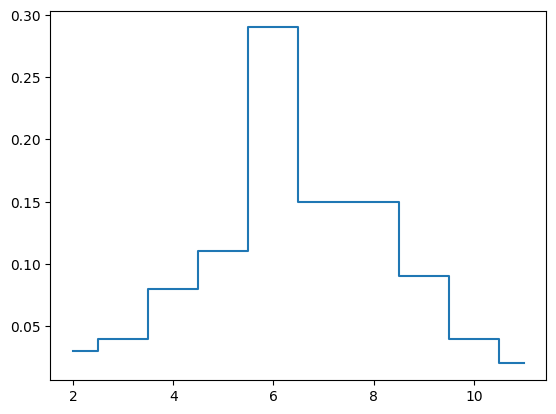

In [165]:
# c) crie 100 amostras de X e faça uma tabela de frequencia no final

altura = pd.Series()

p = .5
for i in range (100):
    summ = 0
    for j in range(13):
        num = 0 if random.random() < p else 1
        summ += num
    altura.loc[i] = summ
    
df_altura = altura.to_frame().rename(columns={0: "Alunos Altos"})
df_altura = df_altura['Alunos Altos'].value_counts().reset_index()
df_altura['freq'] = df_altura['count'] / df_altura['count'].sum()
df_altura = df_altura.sort_values("Alunos Altos")

plt.step(df_altura['Alunos Altos'], df_altura['freq'], where='mid')
df_altura

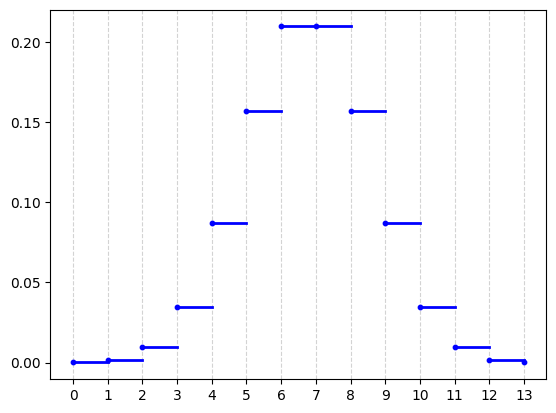

In [224]:
# c opcional (pq eu quero)
# mostra a probabilidade de 1 até 13 casos ocorrerem de um aluno ser alto e faça o plot.

prob_de_ocorr_alt = pd.Series()
for i in range(14):
    res = round(binom.pmf(i, 13, .5), 4)
    prob_de_ocorr_alt.loc[i] = res
prob_de_ocorr_alt

x = (prob_de_ocorr_alt.index).to_numpy()
y = prob_de_ocorr_alt.to_numpy()

x_step = np.repeat(x, 2)[1:-1]
y_step = np.repeat(y, 2)[:-2]

for i in range(0, len(x_step)-1, 2):
    plt.plot(x_step[i:i+2], [y_step[i], y_step[i]], color='blue', linestyle='-', linewidth=2, zorder=3)
    plt.plot([x_step[i+1], x_step[i+1]], [y_step[i], y_step[i+1]], color='red', linestyle='--', linewidth=2, zorder=3)

plt.scatter(x, y, color='blue', s=10, zorder=3)  # pontos só pra referência

plt.xticks(np.arange(min(x), max(x)+1, 1))

plt.grid(axis="x", zorder=0, linestyle="--", color="lightgray")
plt.show()

In [14]:
# e1) probabilidade de P(X=7), P(X < 9), P(0 <= X <= 13)
print(round(binom(13,0.5).pmf(7), 3), round(binom(13, 0.5).cdf(8), 3), round(binom(13, 0.5).cdf(13), 3))

0.209 0.867 1.0


In [34]:
# e2) probabilidade de pelo menos 4 alunos serem baixos
print(binom(13,.5).cdf(9))
print((binom(13,.5).cdf(11)) - (binom(13,.5).cdf(7))) # subtraindo probabilidades de x <= 11 por probabilidades de x <= 7

0.953857421875
0.288818359375


# Exercício 30 (no computador)

,Temposp,count,freq
2,"[0, 10)",89,0.231
0,"[10, 20)",115,0.299
1,"[20, 30)",115,0.299
3,"[30, 40)",40,0.104
4,"[40, 50)",22,0.057
5,"[50, 60)",3,0.008
6,"[60, 70)",1,0.003


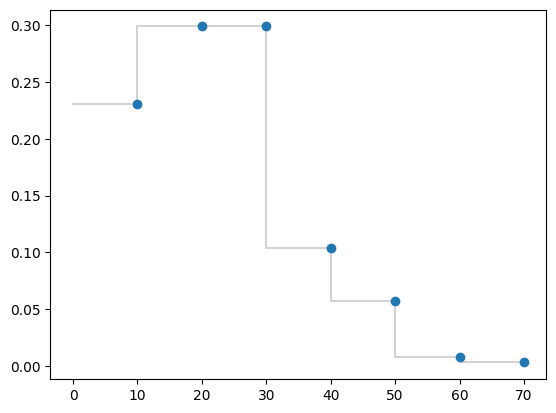

In [110]:
# a)
# para a variável temposp, construa uma tabela de frequencia com intervalos de 10 partindo do 0, obtenha o histograma e discuta o melhor modelo de probabilidade
df_e30 = pd.read_csv("https://www.ime.usp.br/~noproest/dados/aeusp.txt", sep=r"\s+", encoding='latin1')
bins = range(0, df_e30['Temposp'].max() + 10, 10)
s_cut = pd.cut(df_e30['Temposp'], bins, right=False).value_counts().reset_index().sort_values("Temposp")
s_cut['freq'] =  round(s_cut['count']/s_cut['count'].sum(), 3)

plt.scatter(np.arange(10,df_e30['Temposp'].max() + 10, 10), s_cut['freq'],zorder=3)
plt.step(np.arange(10,df_e30['Temposp'].max() + 10, 10), s_cut['freq'], color="lightgray",zorder=0)
plt.plot([0, 10], [s_cut.iloc[0,2], s_cut.iloc[0,2]], color="lightgray")
plt.xticks(np.arange(0,df_e30['Temposp'].max() + 10, 10))
s_cut

,Resid,count,freq
6,1,25,0.065
4,2,30,0.078
1,3,78,0.203
0,4,90,0.234
2,5,57,0.148
3,6,40,0.104
5,7,30,0.078
7,8,17,0.044
8,9,11,0.029
9,10,7,0.018


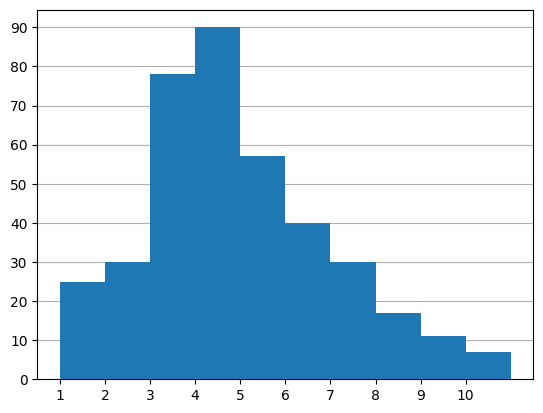

In [141]:
# b)
# faça um histograma da variável Resid e verifique se o modelo binomial com parametros n = 10 e p = 0.5 seria razoavel para verificar o comportamento da variável.
resid = df_e30['Resid'].value_counts().reset_index().sort_values("Resid")
resid['freq'] = round(resid['count']/resid['count'].sum(), 3)

plt.hist(df_e30['Resid'], bins=np.arange(1, 12, 1), zorder=3)
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0, 91, 10))
plt.grid(axis="y", zorder=0)
resid
